### What's Cooking Kaggle challenge

In this kaggle challenge, given a set of ingredients we predict the cuisine.

#### Contents

- Analysis
- Feature Engineering
- Machine Learning


We start by importing some python libraries

In [177]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [178]:
training_data = pd.read_json('./train.json')
test_data = pd.read_json('./test.json')
all_data = training_data.append(test_data)

### Analysis

We perfom some basic analysis over the training data.

##### We find the number of ingredients per dish and plot a histogram

In [179]:
training_data['separate_ingredients'] = training_data['ingredients'].apply(','.join)
min_ingredients = training_data['ingredients'].str.len().min()
max_ingredients = training_data['ingredients'].str.len().max()
print(f'Minimum number of ingredients in a dish {min_ingredients}')
print(f'Maximum number of ingredients in a dish {max_ingredients}')

Minimum number of ingredients in a dish 1
Maximum number of ingredients in a dish 65


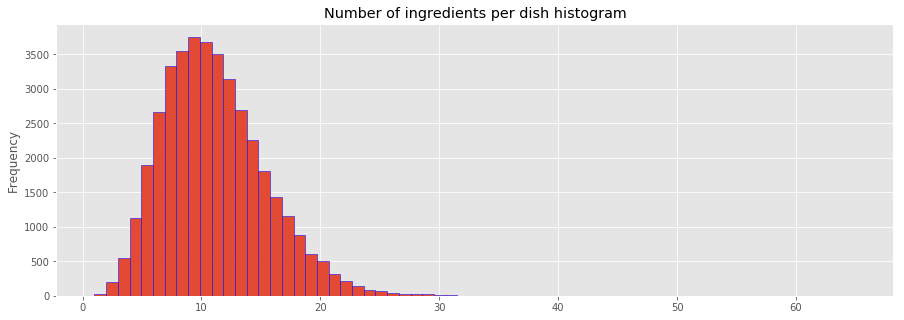

In [180]:
ingredients_histogram = {
    'title': 'Number of ingredients per dish histogram', 
    'figsize': (15, 5),
    'bins': max_ingredients,
    'edgecolor': 'b'
}
fig = training_data['ingredients'].str.len().plot.hist(**ingredients_histogram)

##### Next, We find the top 10 ingredients 

In [181]:
def plot_top15_ingredients(df, bar_title='Top 15 ingredients', bar_color='b'):
    """
    Plots the top 15 ingredients for a given dataframe
    
    :param df: dataframe containing a column with list of ingredients
    :return: None
    """
    unflaten_ingredients = df['ingredients'].tolist()
    ingredients_list = [i for each in unflaten_ingredients for i in each]
    ingredients_freq_df = pd.DataFrame({
        'count': pd.Series(ingredients_list).value_counts().values,
        'ingredients': pd.Series(ingredients_list).value_counts().index
    })
    top15_ingredients = ingredients_freq_df.head(15)
    top15_ingredients_graph = {
        'title': bar_title,
        'figsize': (15, 6),
        'edgecolor': 'w',
        'color': bar_color,
        'fontsize': 11,
    }
    fig = top15_ingredients.plot.barh(x='ingredients', **top15_ingredients_graph)

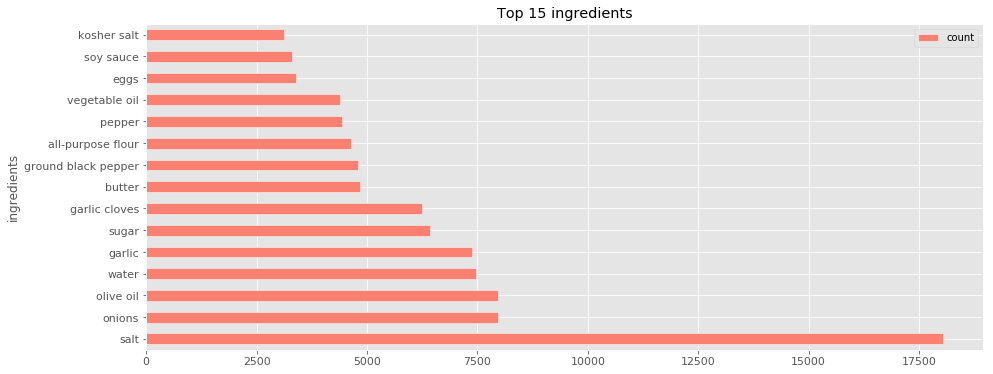

In [188]:
plot_top15_ingredients(training_data, bar_color='salmon')

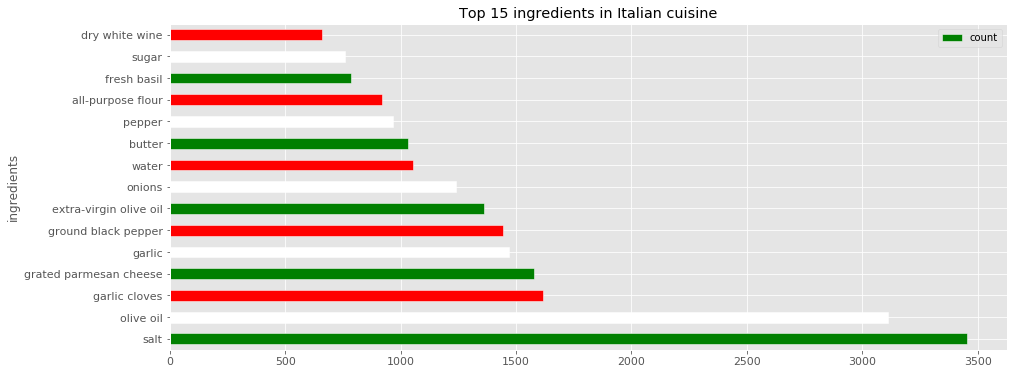

In [183]:
italian_cuisine = training_data.loc[training_data['cuisine'] == 'italian']
plot_top15_ingredients(italian_cuisine,
                       bar_title='Top 15 ingredients in Italian cuisine',
                       bar_color='gwr')

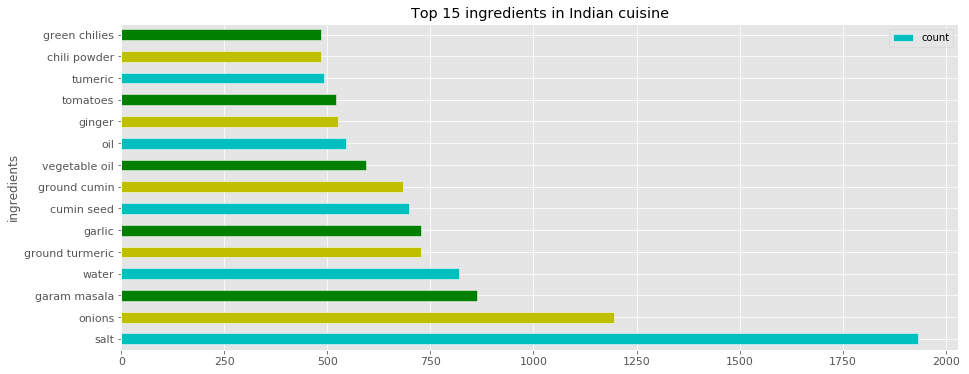

In [184]:
indian_cuisine = training_data.loc[training_data['cuisine'] == 'indian']
plot_top15_ingredients(indian_cuisine,
                       bar_title='Top 15 ingredients in Indian cuisine',
                       bar_color=['cyg'])

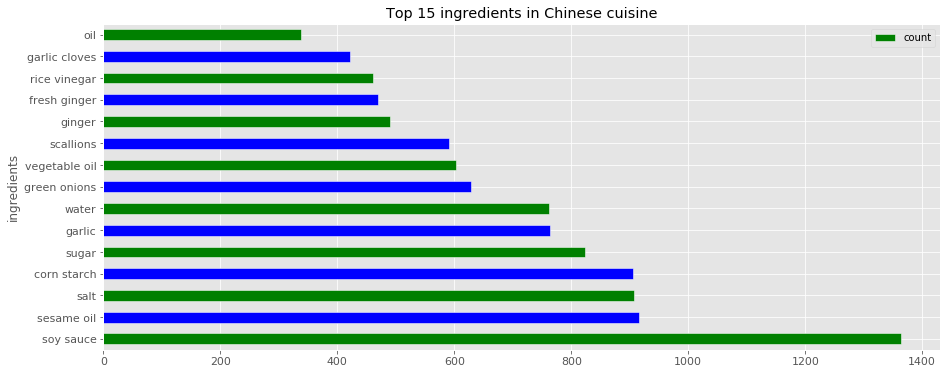

In [187]:
chinese_cuisine = training_data.loc[training_data['cuisine'] == 'chinese']
plot_top15_ingredients(chinese_cuisine,
                       bar_title='Top 15 ingredients in Chinese cuisine',
                       bar_color=['gb'])

##### Next, we see the distribution of cuisine in the training dataset

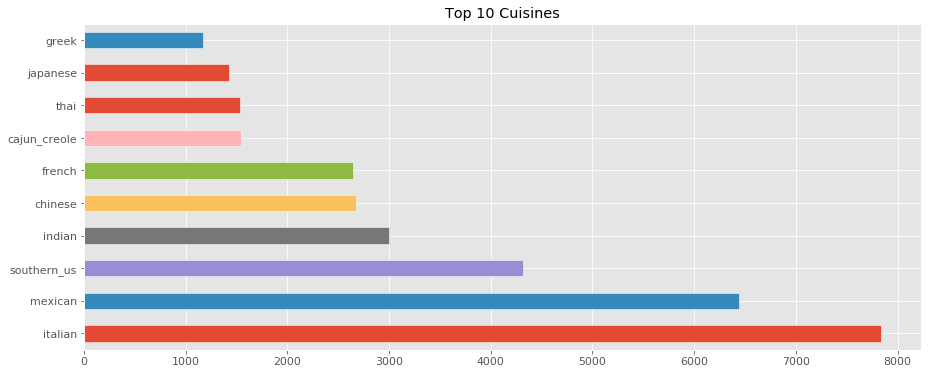

In [186]:
top10_cuisine_graph = {
        'title': 'Top 10 Cuisines',
        'figsize': (15, 6),
        'edgecolor': 'w',
        'fontsize': 11,
    }
fig = training_data['cuisine'].value_counts().head(10).plot.barh(**top10_cuisine_graph)

In [ ]:
#### Feature Engineering

The ingredients are 